In [93]:
import regex as re
import pandas as pd
import inflect
import numpy as np
import contractions
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score

In [94]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eugen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
unclean_data = pd.read_csv("C:/Users/eugen/Downloads/Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv")
unclean_data.head(10)

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
5,The cable keeps coming up with message that th...,1
6,This pos broke off in my phone after 3 uses an...,1
7,This product suck its hard 2 hear wat other ar...,1
8,Music cuts off within 30 secs. I like Aukey's ...,1
9,Yeah when they say mirror screen they mean it ...,1


In [96]:
unclean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [97]:
unclean_data.describe()

,Sentiment
count,25000.000000
mean,3.000000
std,1.414242
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


### Data Cleaning

In [98]:
# remove any Missing values
unclean_data.dropna(inplace=True)

In [99]:
# Replace Sentiment Columns with Positive == 1 and Negative == 0
unclean_data['Sentiment'] = unclean_data['Sentiment'].astype(int)
unclean_data["Sentiment"] = np.where(unclean_data['Sentiment'] <= 3, 0, 1)
unclean_data.head(-100)

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0
...,...,...
24895,Good product,1
24896,My ipod is now protected! I love the color and...,1
24897,Use this in the gym and it has held up very we...,1
24898,Product was exactly what i was looking for. It...,1


In [100]:
# Get the number of positive and negative sentiments
unclean_data['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

In [101]:
# Drop Duplicate columns
before = unclean_data.shape[0]
unclean_data.drop_duplicates(inplace=True)
after = unclean_data.shape[0]
print(f"Number of Rows dropped", before - after)

Number of Rows dropped 228


### Remove Contractions

In [102]:
# convert all float into strings 
unclean_data['Review'] = unclean_data['Review'].apply(lambda x: (str(int(x)) if isinstance(x, float) else x))


In [103]:
# convert all to strings 
p = inflect.engine()
def convert_number(text):
    # split the string into a list of words
    temp_str = text.split()
    new_string = []

    for word in temp_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)

    # join the list into a string
    temp_str = " ".join(new_string)
    return temp_str

unclean_data['Review'] = unclean_data['Review'].apply(convert_number)

In [104]:
unclean_data['Review'] = unclean_data['Review'].apply(contractions.fix)
unclean_data.head(-100)

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it is not ...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0
...,...,...
24892,The screen protector was very easy to put on a...,1
24893,Good sturdy construction. No chance of warping...,1
24894,I love it.<br />cheap and good.,1
24896,My ipod is now protected! I love the color and...,1


### Remove HTML tags

In [105]:
def remove_html(text):
    html_tag = re.compile(r'<.*?>')
    text = html_tag.sub(r'', text)
    return text
unclean_data['Review'] = unclean_data['Review'].apply(remove_html)

In [106]:
unclean_data.head(-100)

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it is not ...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0
...,...,...
24892,The screen protector was very easy to put on a...,1
24893,Good sturdy construction. No chance of warping...,1
24894,I love it.cheap and good.,1
24896,My ipod is now protected! I love the color and...,1


### Remove Punctuation

In [107]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
unclean_data['Review'] = unclean_data['Review'].apply(remove_punctuation)

In [108]:
unclean_data.head(-100)
# now the text is cleaned, next step is to make the words in lower cases

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it is not ...,0
2,Good for not droids Not good for iPhones You c...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0
...,...,...
24892,The screen protector was very easy to put on a...,1
24893,Good sturdy construction No chance of warping ...,1
24894,I love itcheap and good,1
24896,My ipod is now protected I love the color and ...,1


### Lower Case each word

In [109]:
def lower_case(text):
    return text.lower()
unclean_data['Review'] = unclean_data['Review'].apply(lower_case)

In [110]:
unclean_data.head(10)

,Review,Sentiment
0,fast shipping but this product is very cheaply...,0
1,this case takes so long to ship and it is not ...,0
2,good for not droids not good for iphones you c...,0
3,the cable was not compatible between my macboo...,0
4,the case is nice but did not have a glow light...,0
5,the cable keeps coming up with message that th...,0
6,this pos broke off in my phone after three use...,0
7,this product suck its hard two hear wat other ...,0
8,music cuts off within thirty secs i like aukey...,0
9,yeah when they say mirror screen they mean it ...,0


In [111]:
# data is now cleaned
clean_data = unclean_data

### Tokenization

In [112]:
tokenizer = TweetTokenizer()
clean_data['Review'] = clean_data['Review'].apply(tokenizer.tokenize)

#### Remove Stopwords

In [113]:
stop_words = stopwords.words("english")
keep_words =  ["no","not", "on", "off", "too", "out", "over", "under"]
for word in keep_words:
    stop_words.remove(word)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'very', 's', 't', 'can', 'will', 'just', 'don', "do

In [114]:
def filter_token(tokens):
    return [token for token in tokens if token not in stop_words]
clean_data['Review'] = clean_data['Review'].apply(filter_token)

In [115]:
clean_data.head(10)

,Review,Sentiment
0,"[fast, shipping, product, cheaply, made, broug...",0
1,"[case, takes, long, ship, not, even, worth, no...",0
2,"[good, not, droids, not, good, iphones, cannot...",0
3,"[cable, not, compatible, macbook, iphone, also...",0
4,"[case, nice, not, glow, light, disappointed, p...",0
5,"[cable, keeps, coming, message, accessory, not...",0
6,"[pos, broke, off, phone, three, uses, luckily,...",0
7,"[product, suck, hard, two, hear, wat, saying]",0
8,"[music, cuts, off, within, thirty, secs, like,...",0
9,"[yeah, say, mirror, screen, mean, ipod, become...",0


### Lemmatization

In [116]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(tokens):
    return " ".join([lemmatizer.lemmatize(token) for token in tokens])

clean_data['Review'] = clean_data['Review'].apply(lemmatize_word)

In [117]:
clean_data.head(10)

,Review,Sentiment
0,fast shipping product cheaply made brought gra...,0
1,case take long ship not even worth not buy,0
2,good not droids not good iphones cannot use fe...,0
3,cable not compatible macbook iphone also conne...,0
4,case nice not glow light disappointed product ...,0
5,cable keep coming message accessory not suppor...,0
6,po broke off phone three us luckily able pull ...,0
7,product suck hard two hear wat saying,0
8,music cut off within thirty sec like aukeys pr...,0
9,yeah say mirror screen mean ipod becomes like ...,0


### Word Cloud

In [118]:
def generating_word_cloud(text):
    wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
    plt.figure(figsize=(15,10))
    plt.imshow(wordCloud.generate(text),interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Sentiment 0 Word  Cloud

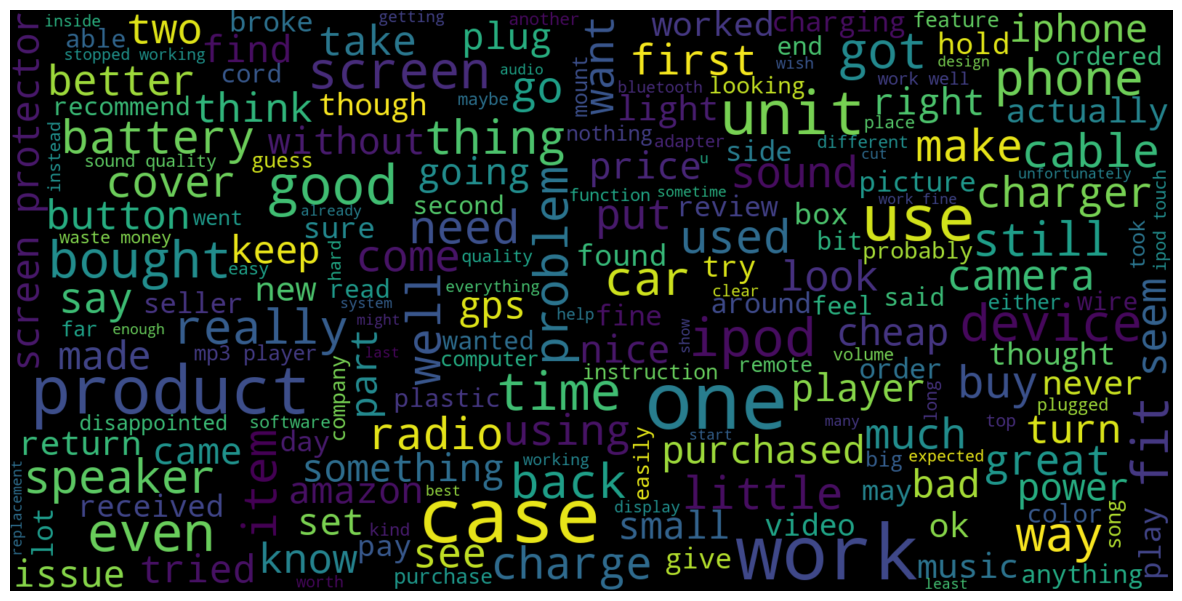

In [119]:
text_0 = ' '.join(word for word in clean_data['Review'][clean_data['Sentiment'] == 0].astype(str))
generating_word_cloud(text_0)

### Sentiment 1 Word Cloud

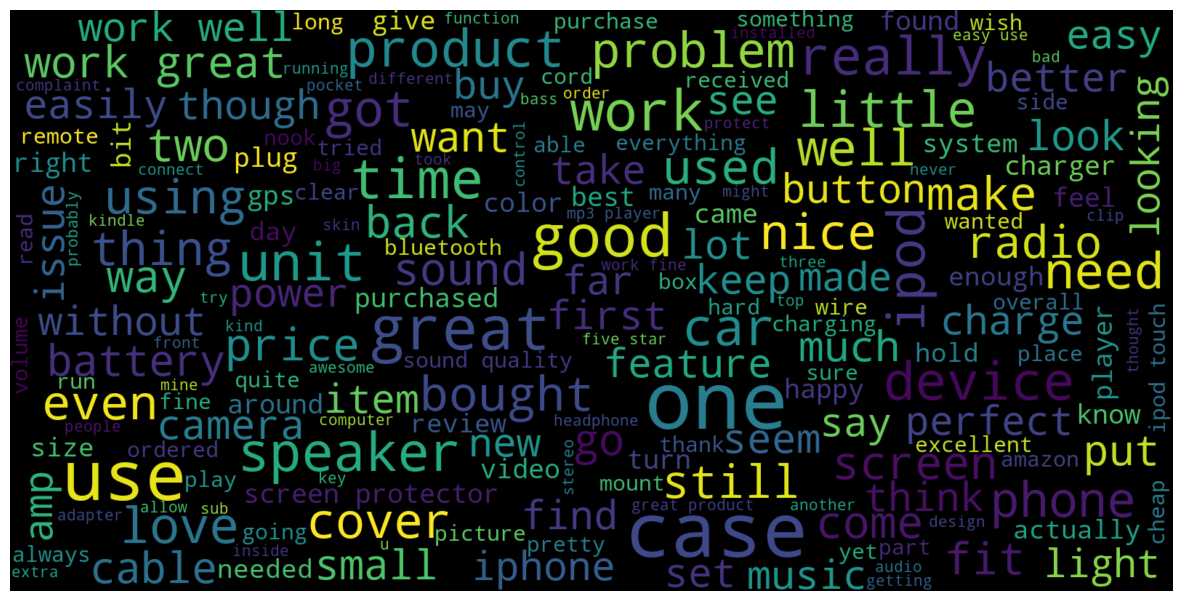

In [120]:
text_1 = ' '.join(clean_data['Review'][clean_data['Sentiment'] == 1].astype(str))
generating_word_cloud(text_1)

In [121]:
X = clean_data['Review']
Y = clean_data['Sentiment']
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size= 0.2,shuffle= True ,random_state= 1101)
print("Shape of X_train:" , X_train.shape[0])
print("Shape of Y_train:" , Y_train.shape[0])
print("Shape of X_test:" , X_test.shape[0])
print("Shape of Y_test:" , X_test.shape[0])
print(clean_data['Review'].shape[0])

Shape of X_train: 19816
Shape of Y_train: 19816
Shape of X_test: 4955
Shape of Y_test: 4955
24771


### Vectorization

In [122]:
# Initialize object
vectorizer  = TfidfVectorizer()

# Convert all the reviews into TFIDF
tf_idf_X_train = vectorizer.fit_transform(X_train)
tf_idf_X_test = vectorizer.transform(X_test)
print(tf_idf_X_test.shape) # checking if both have the same number of features
print(tf_idf_X_train.shape)

(4955, 33468)
(19816, 33468)


### Train the Model (RandomForest, LR, Naive Bayes)

##### RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
number_of_trees = [50, 100, 150, 200]
for i in number_of_trees:
    random_forest_clf =  RandomForestClassifier(n_estimators=i)
    random_forest_model = random_forest_clf.fit(tf_idf_X_train, Y_train) # fit the model
    predict_random_forest_model_test = random_forest_model.predict(tf_idf_X_test)
    predict_random_forest_model_train = random_forest_model.predict(tf_idf_X_train)
    train_set_accuracy = accuracy_score(predict_random_forest_model_train, Y_train)
    test_set_accuracy = accuracy_score(predict_random_forest_model_test, Y_test)
    print(f"accuracy on the training set with {i} trees: {train_set_accuracy}")
    print(f"accuracy on the test set with {i} trees: {test_set_accuracy}\n")


accuracy on the training set with 50 trees: 0.9979309648768672
accuracy on the test set with 50 trees: 0.7973763874873865

accuracy on the training set with 100 trees: 0.9979309648768672
accuracy on the test set with 100 trees: 0.7993945509586277

accuracy on the training set with 150 trees: 0.9979309648768672
accuracy on the test set with 150 trees: 0.8024217961654894

accuracy on the training set with 200 trees: 0.9979309648768672
accuracy on the test set with 200 trees: 0.8028254288597376



#### Logistic Regression 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logistic_model = LogisticRegression(max_iter=500, random_state=1101)

param_grid = {
    'C': [0.01 ,0.1, 1, 10, 100], 
    'penalty': ['l2'],  
    'solver': ['lbfgs']  
}
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid= param_grid,scoring='accuracy', cv = 5)
grid_search_logistic.fit(tf_idf_X_train, Y_train)

# Best parameters and average accuracy score
print("Best Parameters:", grid_search_logistic.best_params_)
print("Mean Cross-Validation Accuracy:", grid_search_logistic.best_score_)

# Evaluate on the test set
best_log_reg = grid_search_logistic.best_estimator_
test_accuracy = accuracy_score(Y_test, best_log_reg.predict(tf_idf_X_test))
print("Test Accuracy:", test_accuracy)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean Cross-Validation Accuracy: 0.8202465260776206
Test Accuracy: 0.8217961654894046


### Naive Bayes

In [125]:
from sklearn.naive_bayes import MultinomialNB
multinomialNB_model = MultinomialNB()
param_grid = {
    'alpha' : [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
    'fit_prior' : [True, False]
}

grid_search = GridSearchCV(
    estimator = multinomialNB_model,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 5

)
grid_search.fit(tf_idf_X_train, Y_train)

# Best parameters and average accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = accuracy_score(Y_test, best_model.predict(tf_idf_X_test))
print("Test Accuracy:", test_accuracy)

Best Parameters: {'alpha': 0.5, 'fit_prior': False}
Best Cross-Validation Accuracy: 0.7836096786292377
Test Accuracy: 0.7854692230070636


#### The Logistic Regression model demonstrated the highest performance with a test accuracy of 0.829. Additionally, the mean cross-validation accuracy is 0.820, indicating that the model generalizes well and does not exhibit signs of overfitting.